In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 30: Properties of Estimators

Now that we have seen two different ways to obtain parameter estimates, we will now look into ways to evaluate estimators. What makes an estimator a good estimator? We have briefly discussed bias, but we'll also discuss consistency. 

### Bias

(Review from Lesson 28). If we use an iid random sample to obtain an estimate of some parameter $\theta$, this estimate ($\hat{\theta}$) is a random variable. Each time I collect a new sample, I will get a different $\hat{\theta}$. Ideally, the distribution of this $\hat{\theta}$ should have an average (expected value) of $\theta$. 

If $E(\hat{\theta})=\theta$, then $\hat{\theta}$ is said to be unbiased. 

### Example 1: Uniform Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the continuous uniform distribution on the domain $0 \leq X \leq b$ with unknown parameter $b$. From lessons 28, we found that the method of moments estimate of $b$ is $2\bar{X}$. 

Is this estimate biased? Particularly, find $E(2\bar{X})$. 


$\begin{align}
E(2\bar{X})&=2E(\bar{X})\\
&=2E(X)\\
&=2E(\frac{X_1+X_2+...+X_n}{n})\\
&=\frac{2}{n}E(X_1+X_2+...+X_n)\\
&=\frac{2}{n}(n)E(X_i)\\
&=2E(X_i)\\
&=2\left(\frac{b}{2}\right)\\
&=b
\end{align}$

Thus, the method of moments estimate is not biased, since $E(\hat{b})=b$.

*Class Note: $E(\bar{X})=E(X)$ is a numerical law, applicable in all situations.*

### Example 2: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. From lessons 28 and 29, we found that the method of moments and maximum likelihood estimates are both $\frac{1}{\bar{X}}$. 

Is this estimate biased? For this exercise, assume $\lambda=5$ and the size of each sample is 20. You will probably find it easier to do this via simulation (use `scipy` to generate a random sample from the exponential distribution with your choice of $\lambda$. Use this sample to obtain the estimate. Repeat this process many times to get a distribution $\hat{\lambda}$.) 

(array([ 525., 3001., 3460., 1927.,  725.,  250.,   83.,   17.,    8.,
           4.]),
 array([ 2.49409778,  3.57096131,  4.64782484,  5.72468836,  6.80155189,
         7.87841541,  8.95527894, 10.03214247, 11.10900599, 12.18586952,
        13.26273304]),
 <a list of 10 Patch objects>)

5.248992325374288

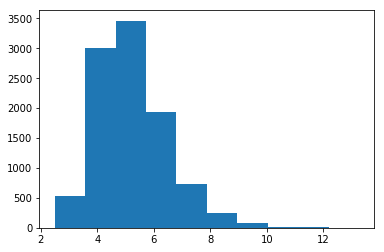

In [18]:
l,n=5,20
lDist = make_array()

for _ in np.arange(10000):
    # Get single sample
    X = stats.expon.rvs(scale=1/l,size=n)
    # Get the estimate for the parameter
    est = 1/(np.mean(X))
    lDist = np.append(lDist, est)
    
plt.hist(lDist);

np.mean(lDist)

#Fun code: lDist = [1/np.mean(stats.expon.rvs(scale=1/l,size=m)) for _ in np.arange(10000)]

*The estimate **IS** biased, since the distribution's mean tends to be about 0.25 too high. Doubling the sample size will halve the bias, making the estimate asymptotically unbiased.*

Given: since $X_i\text{~Exp}(\lambda)$, then $\sum_{i=1}^n X_i \text{~Gamma}(n,\lambda)$.

$\begin{align}
E\left(\frac{1}{\bar{X}}\right)&=E\left(\frac{n}{X_1+X_2+...+X_n}\right)
\end{align}$

*Class note: $E({1 \over \bar{X}})\neq{1 \over E(\bar{X})}$*

## Consistency

An estimator is considered consistent if for any $\epsilon >0$, 

$$
\underset{n \to \infty}{\lim} P(|\hat{\theta}_n -\theta|<\epsilon)=1
$$

This is just a fancy way of saying that as $n$ increases, the estimator tends to get closer to $\theta$. 

### Lemma

An estimator is consistent if it is unbiased and if $\underset{n \to \infty}{\lim} Var(\hat{\theta}_n)=0$. In other words, an unbiased estimator is consistent if its variance goes to zero as sample size goes to infinity. 

### Example 3: Uniform Distribution

In Example 1, we showed that the method of moments estimator for $b$ is unbiased. Is it also consistent? What is the variance of this estimator? What happens to this variance as $n$ increases? 

$$
\begin{align}
Var(\hat{b}_{MoM})&=Var(2\bar{X})\\
&=4 Var(\frac{x_1+x_2+...+x_n}{n})\\
&=\frac{4}{n^2}(Var(x_1)+Var(x_2)+...+Var(x_n))\\
&=\frac{4}{n}Var(x)\\
Var(\hat{b}_{MoM})&=\frac{4\sigma^2}{n}\\
\lim_{n\to\infty}Var(\hat{b}_{MoM})&=0
\end{align}
$$

*The estimator is consistent, since the variance has a 1/n term that approaches 0.*

### Example 4: Normal Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the normal distribution with unknown mean and standard deviation. The method of moments (and maximum likelihood) estimator of $\mu$ is simply $\bar{X}$. We have already established that this estimate is unbiased. Is it consistent? 

$$
\begin{align}
Var(\hat{\mu})&=Var(\bar{X})\\
&=\frac{1}{n^2}Var(x_1+x_2+...+x_n)\\
&=\frac{\sigma^2}{n}
\end{align}
$$

*Just like with the Uniform disytibution, the estimator is consistent.*

## Weak Law of Large Numbers

It turns out that for all distributions, the sample mean is a consistent estimator for the population mean. This is known as the Weak Law of Large Numbers. 

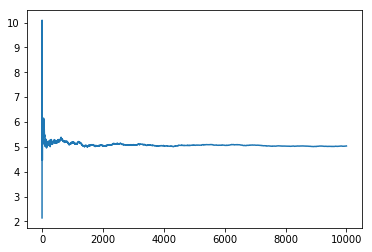

In [2]:
ns=np.arange(1,10001)
samp=stats.norm.rvs(5,6,size=10000)
sampmeans=np.cumsum(samp)/ns
plt.plot(ns,sampmeans)
plt.show()